# Genomic Variants: Introduction to whole exome sequence data



## Getting Started

This document aims to guide the hackathon participants, who have limited exposure to Synapse as a platform and clinical/biological data, through exploration and analysis of the available [whole exome sequence](https://ghr.nlm.nih.gov/primer/testing/sequencing) dataset. The available dataset is a harmonized dataset including genomic variant (WES) data from normal and two different tumor types from two different study initiatives. 

The scope of this document is to inform participants:

* how to navigate the Synapse environment to access and work with the data files stored in Synapse
* display the key features of the genomic variant (WES) dataset 
* introduce few general analysis steps of the data and their interpretation

At the end of this document, the participants will be able to download the data and understand various intricacies that exist in this given dataset. We encourage participants to visualize the dataset by faceting on different variables to get an accurate understanding of the dataset. 


## Logging in to Synapse

Please download your Synapse client for [Python](https://python-docs.synapse.org//build/html/index.html) and refer to the necessary docs [Python](https://python-docs.synapse.org//build/html/index.html) to successfully log in to synapse and start using its various analytical tools.



In [1]:
import synapseclient

syn = synapseclient.Synapse()

## log in using username and password
syn.login()

Welcome, Jineta Banerjee!



In [2]:
# import all necessary packages

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.style as style
style.use('ggplot')

from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42 
rcParams['font.sans-serif'] = 'Arial'
# ignore FutureWarning that may pop up when plotting
import warnings
warnings.filterwarnings("ignore")
import urllib3
urllib3.disable_warnings()

from dfply import *
%matplotlib inline
from matplotlib import *
import sys
from pylab import *


#Plotting with Bokeh
from bokeh.io import output_notebook
from bokeh.models import BasicTicker, ColorBar, ColumnDataSource, LinearColorMapper, PrintfTickFormatter
from bokeh.plotting import figure, output_file, show
from bokeh.sampledata.unemployment1948 import data
from bokeh.transform import transform
from bokeh.palettes import brewer

#Plot with Seaborn
import seaborn as sns

## Accessing or downloading data from Synapse

* Look up the SynID of the required file and then use the __syn.get__ command to access the folder. 
* Download the required csv file 


In [3]:
entity = syn.get('syn20812188')

In [4]:
results = syn.tableQuery("SELECT * FROM syn20812188")
genes_with_meta = results.asDataFrame()
type(genes_with_meta)

pandas.core.frame.DataFrame

In [5]:
#Clean up data format
genes_with_meta = genes_with_meta.replace(to_replace = "male", value = "Male")
genes_with_meta = genes_with_meta.replace(to_replace = "female", value = "Female")
genes_with_meta = genes_with_meta.reset_index()
genes_with_meta = genes_with_meta.drop(labels=["index"], axis =1)

# Explore the data files

The accessed file is a dataframe which contains the genomic variant data collected from normal and tumor samples of three different tumor types under two different study initiatives. The last few columns of the dataframe contain meta-data associated with the samples. All silent mutations (mutations that do not affect the sequence of amino acids in the protein product of the gene) have been removed to facilitate analysis of mutations that may affect protein sequences.

## Structure of the file

Lets first take a brief look at the contents of the accessed file:

In [6]:
print("Contents of the file:")
genes_with_meta.head()

Contents of the file:


,Tumor_Sample_Barcode,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Variant_Classification,...,nf2Genotype,organ,isCellLine,sex,species,specimenID,study,studyId,disease,tumorType
0,136816-1163242085,SAMD11,148398,.,GRCh37,1,877831,877831,+,Missense_Mutation,...,+/+,blood,False,Male,Human,2-010 Blood,JHU NTAP Biobank,syn4939902,NaN,Normal
1,136816-1163242085,NOC2L,26155,.,GRCh37,1,888659,888659,+,Missense_Mutation,...,+/+,blood,False,Male,Human,2-010 Blood,JHU NTAP Biobank,syn4939902,NaN,Normal
2,136816-1163242085,NOC2L,26155,.,GRCh37,1,889238,889238,+,Missense_Mutation,...,+/+,blood,False,Male,Human,2-010 Blood,JHU NTAP Biobank,syn4939902,NaN,Normal
3,136816-1163242085,NOC2L,26155,.,GRCh37,1,892488,892488,+,Frame_Shift_Del,...,+/+,blood,False,Male,Human,2-010 Blood,JHU NTAP Biobank,syn4939902,NaN,Normal
4,136816-1163242085,PLEKHN1,84069,.,GRCh37,1,909238,909238,+,Missense_Mutation,...,+/+,blood,False,Male,Human,2-010 Blood,JHU NTAP Biobank,syn4939902,NaN,Normal


In [7]:
print("Size of the file:")
print(genes_with_meta.shape)

Size of the file:
(461709, 152)


The following table contains descriptions of some of the metadata variables included in the data file:

Var | Description
--- | --- 
 _Hugo-Symbol_  |  names of genes according to HUGO databas
 _Entrez-gene-Id_  |  Gene ID according to Entrez Database
 _NCBI-Build_ | Reference genome that was used to align the exomeSeq data
 _Chromosome_ | Chromosome number (range 1-22 and X,Y),  Chr M == mitochondrial genome (absent in exomes with NCBI Build == hg19)
 _species_  |  the source of the specimen
 _age_  |  the age of the patient 
 _sex_  |  the sex of the patient
 _tumorType_  |  the the type of tumor, can be one of 7 different diagnoses
 _isCellLine_  |  indicates whether the origin tissue was a cell line or a patient
 _study_  |  the specific initiative/consortia that the study was a part of
 _id_ | Synapse ID of the sample (unique for each sample)

For more information regarding various columns in the dataset please visit here: https://docs.gdc.cancer.gov/Data/File_Formats/MAF_Format/#vep

## Metadata 

The metadata in a healthcare study includes descriptions of the specimens, and the details of the studies they originated from. We can explore the metadata by visualizing various aspects of it to get a sense of the data contained within our dataset and put it in context of the disease and patients.

For example, we can visualize the data distribution according to sex.


Whole exome sequence sample distribution


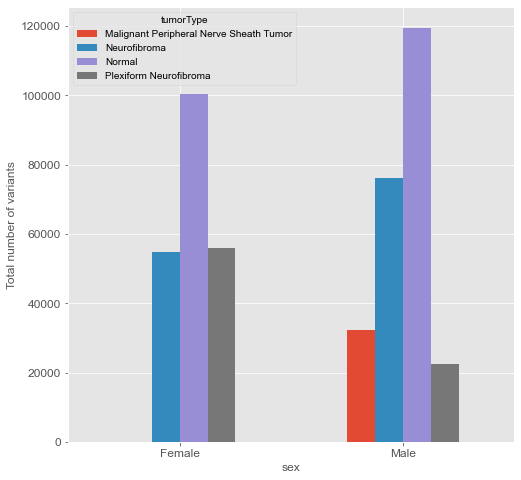

In [9]:
#select a particular column
genes_with_meta.sex = genes_with_meta['sex'].astype('category')
genes_with_meta.tumorType = genes_with_meta['tumorType'].astype('category')


#make the plot
print("Whole exome sequence sample distribution")
genes_with_meta_table = pd.crosstab(index=genes_with_meta["sex"], 
                          columns=genes_with_meta["tumorType"])
genes_with_meta_table.plot(kind ='bar', figsize=(8,8), position= (0.5), fontsize= 12, rot=0)
plt.ylabel("Total number of variants", fontsize = 12)
plt.show()

We can also look at the different types of mutations observed for various genes in our dataset according to the tumor type. The different types of variants recognized in our dataset include:

Variant_classification | Description
--- | ---
_Nonsense-Mutation_ | Mutation leading to change of a coding codon to stop codon
_Splice-Site_ | Mutation leading to change in splice site
_Missense-Mutation_ | Mutation resulting in change in amino acid
_In-Frame-Del_ | Deletion of nucleotides divisible by three leading to deletions of amino acids
_In-Frame-Ins_ | Insertion of nucleotides divisible by three leading to insertion of amino acids
_Frame-Shift-Ins_ | Insertions of nucleotides (not divisible by three) such that codons downstream of the insertion are shifted resulting in a malformed protein or nonsense-mediated decay
_Frame-Shift-Del_ | Deletions of nucleotides (not divisible by three) such that codons downstream of the deletion are shifted resulting in a malformed protein or nonsense-mediated decay
_Translation-Start-Site_ | Mutation causing changes in translation start site
_Nonstop-Mutation_ | SNP in stop codon that disrupts the stop codon causing continued translation

More information regarding variants can be found [here](https://uswest.ensembl.org/info/genome/variation/prediction/classification.html#classes)

## Visualizing variants in samples

The different variant classifications mentioned above can have different impact on the protein products of the genes. Lets first take a look at the number of high impact variants in the first 100 genes in our samples.

In [11]:
## Data wrangling to make the appropriate dataframe for visualization

#Select specific columns 
genes = genes_with_meta[["id","Hugo_Symbol","Variant_Type", "FILTER", "IMPACT"]]

# Select genes with high impact variants
genes = genes.loc[(genes['IMPACT'] == "HIGH") & (genes['FILTER'] != "common_variant")]

# Re-type the columns
genes.Hugo_Symbol = genes['Hugo_Symbol'].astype('category')
genes.id = genes['id'].astype('category')

# Add dummy variable to represent variants for PCA
dummy = pd.get_dummies(genes["Variant_Type"])
dummy["totHits"] = dummy.sum(axis=1).astype(int)
genes = pd.concat([genes, dummy], axis=1)
#genes.head()

# Calculate total number of high impact hits to genes in a sample
grouped = pd.DataFrame(genes.groupby(["id","Hugo_Symbol"]).totHits.sum())
#grouped.head()

# Reset indices of the dataframe and select relevant columns for pivoting
grouped = grouped.reset_index()
grouped = grouped[["id", "Hugo_Symbol","totHits"]]
#grouped.head()

#Cleaning up dataframe to avoid NaN
genes_pca_clean = grouped.pivot(index='id', 
                                columns='Hugo_Symbol', 
                                values='totHits')

#Fill NaN values with 0
genes_pca_clean = genes_pca_clean.fillna(0)

#check the resulting dataframe
#genes_pca_clean.head()
#len(genes_pca_clean)

In [12]:
## Plot the number of high impact mutations in genes using bokeh

#Select 1st 50 genes 
new_df = genes_pca_clean.iloc[:, 0:100]

# reshape to 1D array or rates with a month and year for each row.
df = pd.DataFrame(genes_pca_clean.stack(), columns=['totHits']).reset_index()

#Data source for plot
source = ColumnDataSource(df)

# Colors
colors = ['#f7fbff','#6baed6','#ff7f0e', '#9467bd',  '#2171b5', '#084594', '#2ca02c']
mapper = LinearColorMapper(palette=colors, low=df.totHits.min(), high=df.totHits.max())

#Plot
output_notebook()
p = figure(plot_width=800, plot_height=800, title="Number of high impact mutations per gene",
           x_range=list(new_df.index), y_range=list(reversed(new_df.columns)),
           toolbar_location=None, tools="", x_axis_location="above")

p.rect(x="id", y="Hugo_Symbol", width=5, height=5, source=source,
       line_color='#deebf7', fill_color=transform('totHits', mapper))

color_bar = ColorBar(color_mapper=mapper, location=(0, 0),
                     ticker=BasicTicker(desired_num_ticks=len(colors)),
                     formatter=PrintfTickFormatter(format="%d"))

p.add_layout(color_bar, 'right')

p.axis.axis_line_color = None
p.axis.major_tick_line_color = None
p.axis.major_label_text_font_size = "5pt"
p.axis.major_label_standoff = 0
p.xaxis.major_label_orientation = 1.0

show(p)

Loading BokehJS ...

We can also zoom in to look closely at the different kinds of mutations in specific genes of our choice.

Different variant types in the NF1 gene


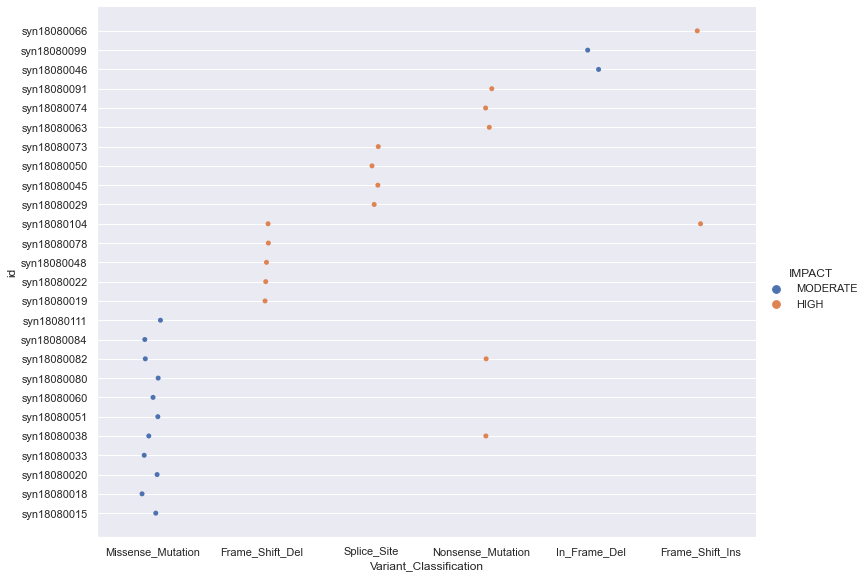

In [16]:
#Remake the appropriate dataframe

#Select specific columns 
nf1_genes = genes_with_meta[["id","Hugo_Symbol","Variant_Classification", "FILTER", "IMPACT"]]

# Re-type the columns
nf1_genes.Hugo_Symbol = nf1_genes['Hugo_Symbol'].astype('category')
nf1_genes.id = nf1_genes['id'].astype('category')

# Add dummy variable to represent variants for PCA
nf1_dummy = pd.get_dummies(nf1_genes["Variant_Classification"])
nf1_dummy["totHits"] = nf1_dummy.sum(axis=1).astype(int)
nf1_genes = pd.concat([nf1_genes, nf1_dummy], axis=1)

nf1 = nf1_genes.loc[nf1_genes['Hugo_Symbol']=='NF1'].reset_index()
nf1.head()

print("Different variant types in the NF1 gene")
sns.set(font_scale=1) 
sns.catplot(x="Variant_Classification",y="id",data=nf1, hue="IMPACT",
             jitter=True, height = 8, aspect =8/6)

Mutations in _nf1_ gene have been strongly correlated with the diagnosis and prognosis of Neurofibromatosis 1. The plot above confirms the presence of various types of mutations in the _nf1_ gene in our patient samples. 

Different variant types in the ASTE1 gene


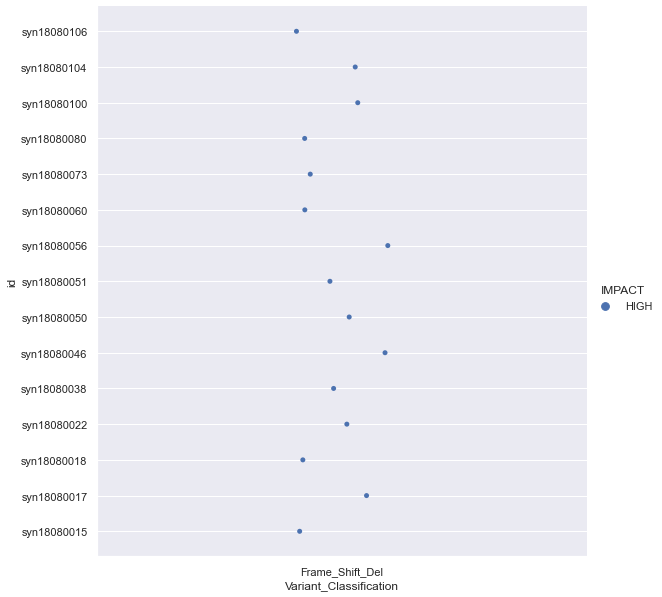

In [17]:
nf1 = nf1_genes.loc[nf1_genes['Hugo_Symbol'] == "ASTE1"].reset_index()
nf1.head()

print("Different variant types in the ASTE1 gene")
sns.set(font_scale=1) 
sns.catplot(x="Variant_Classification",y="id",data=nf1, hue="IMPACT",
            jitter=True, height=8.27, aspect=8.27/8.27)

The gene _aste1_ encodes a protein that may be involved in epithelial growth factor signaling, a pathway that is implicated in uncontrolled cell growth. We observe the presence of frame shift deletions in this gene in some of our samples.

# Data Analysis

## Dimensionality Reduction

To explore the data and find meaningful differences between samples, we first perform a simplistic principal component analysis, and explore the genes that are top contributors to the first few principal components. 

We tested the hypothesis whether the number of mutations in a set of genes can be used for segmenting the data/samples into meaningful groups. For this, we first created a scoring matrix by converting variant data into numerical variables for PCA. 

We used the number of mutational events (_hits_) in each gene as a scoring metric for the gene to do our principal component analysis. Since some genomic variants can be quite common and many of them are well tolerated, we filtered out all known common_variants in the genes and selected for the ones with high impact on proteins to strengthen the signal for PCA. 

In [18]:
#Perform PCA 
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(genes_pca_clean)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
#principalDf.tail()
#print(pca.components_)

In [19]:
#Extract Sample information to add to PCA plot
df = pd.pivot_table(genes,index="id")
new_df = df.reset_index(level=['id'])
#new_df.head()

In [20]:
#Make DF for plotting
finalDf = pd.concat([principalDf, new_df[['id']]], axis = 1)
#finalDf.head()

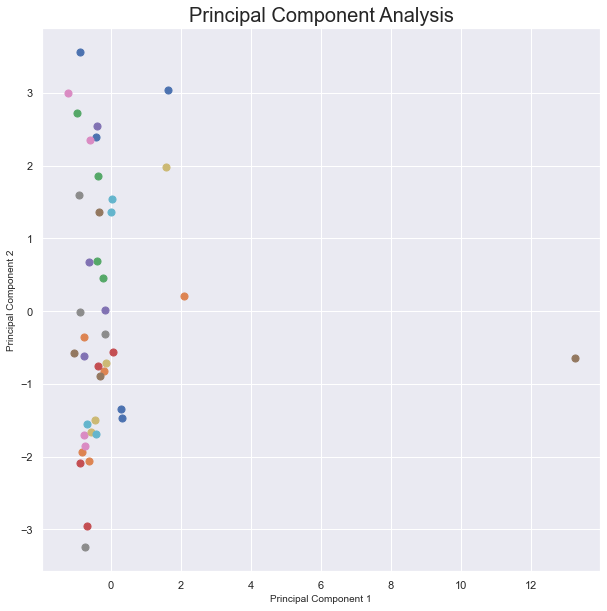

In [21]:
#Plot the PCA results 
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 2', fontsize = 10)
ax.set_title('Principal Component Analysis', fontsize = 20)
targets = finalDf['id']
for target in targets:
    indicesToKeep = finalDf['id'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
              # , c = 'b'
               , s = 50)

In [22]:
print("Variance explained by PC1 and PC2:")
print(pca.explained_variance_)

Variance explained by PC1 and PC2:
[4.85928387 3.16151316]


We note that the PCA seems to identify one sample as an outlier and possibly two clusters in the data. However, even with our efforts to select relevant mutations, the first two principal components are limited in identifying major sources of variation in the data. 

We encourage the participants to explore other variables present in the dataset and combinations thereof to find more significant sources of variance within the data. 